# My Report: Cyclists and Weather in the german city of Konstanz.

This Report uses two open datasets from Mobilithek [Dataset1](https://offenedaten-konstanz.de/sites/default/files/Zaehlstelle_Herose_2021_15min.csv) and [Dataset2](https://meteostat.net/de/station/10929?t=2021-01-01/2021-12-31) to show a correaltion between different weather conditions and the amnout of bikers driving through a popular and central spot in the south german city of Konstanz.

The question that interests me is: How is the amount of cyclists influenced by different weather conditions?

## Table of Contents

- [1. Introduction](#1-introduction)

    -  [1.1. Motivation](#11-motivation)

    -  [1.2. Approach](#12-approach)

- [2. Analysis](#2-analysis)

    - [2.1. Install dependencies](#21-install-dependencies)

    - [2.2. Load data](#22-load-data)

    - [2.3. Data exploration](#23-data-exploration)
    
    - [2.4. Findings](#24-findings)

- [3. Conclusion](#3-conclussion)

    - [2.4. Summary of findings](#31-summary-of-findings)

    - [2.4. Problems](#32-problems)

    - [2.4. Outlook](#33-outlook)

## 1. Introduction



### 1.1. Motivation

Cycling is an increasingly popular mode of transportation, providing individuals with an environmentally friendly and physically active alternative to motorized vehicles. While previous research has examined various factors influencing cycling behavior, such as infrastructure, accessibility, and socio-economic characteristics, the impact of weather conditions remains an understudied area. Understanding how weather conditions affect daily cyclist counts can aid in predicting and optimizing cycling infrastructure, developing effective policies, and encouraging active transportation. The motivation behind this project stems from the need to fill the existing research gap regarding the relationship between weather conditions and cycling behavior. By investigating the potential influence of weather on daily cyclist counts in Konstanz, this study aims to provide valuable insights into how weather conditions might affect cycling patterns in the region. These insights can then be used to inform urban planning decisions, improve cycling infrastructure, and design targeted interventions to encourage cycling under specific weather conditions.

### 1.2. Approach

The approach of this study involved three main stages: pipeline creation, data exploration, and analysis. The initial stage focused on creating a Python pipeline to streamline the data processing and analysis steps. The pipeline was designed to ensure consistency and reproducibility throughout the project, allowing for efficient data handling and facilitating subsequent tasks.

Once the pipeline was established, the data exploration stage commenced. The datasets, consisting of daily cyclist counts in Konstanz and corresponding weather conditions, were loaded into the pipeline. The data exploration phase involved carefully inspecting the datasets, examining their structure, variables, and potential data quality issues. This process aimed to gain a comprehensive understanding of the available information, identify any patterns or anomalies, and prepare the data for further analysis.

Following the data exploration, the analysis phase focused on investigating the relationship between weather conditions and cyclist counts in Konstanz. The specific attributes of average temperature, rainfall, and the duration of sunshine were selected for analysis based on their potential relevance to cycling behavior.

In the following the analysis will be presented.

## 2. Analysis

### 2.1. Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [20]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 2.2. Load data
Create two pandas dataframes using the two tables in the local sqlite file "datasets".

In [28]:
import pandas as pd

df1 = pd.read_sql_table('dataset1', 'sqlite:///data/datasets.sqlite')
df2 = pd.read_sql_table('dataset2', 'sqlite:///data/datasets.sqlite')

### 2.3. Data exploration

Before going deeper into the topic, first the two choosen datasets get inspected briefly.

#### Dataset 1: Bikers in Konstanz

##### Dataset1: Overview

This dataset lists the amount of bikers driving through a popular central spot in the south German city Konstanz. Thereby the dataset has information about the amount of bikers driving towards the city center and corresponding the amount of bikers leaving the city center. Adddtionally the dataset contains a column for the total amount of bikers driving through this spot. The last one is the column that is interesting for this project and thus the report. Originally the data was strucutred in a way, that shows the amount of bikers that pass this spot in a ratio of 15 minutes. This was aggregated to a daily ratio in the beginning of the project via the data pipeline. 

##### Dataset 1: Example

In the following, the first ten rows of dataset 1 are shown examplarily.

In [29]:
df1.head(10)

,Date,Total bikers,Bikers inward,Bikers outward
0,2021-01-01,1398.0,664.0,734.0
1,2021-01-02,2375.0,1172.0,1203.0
2,2021-01-03,1844.0,889.0,955.0
3,2021-01-04,3601.0,1751.0,1850.0
4,2021-01-05,4237.0,2108.0,2129.0
5,2021-01-06,1409.0,679.0,730.0
6,2021-01-07,3545.0,1771.0,1774.0
7,2021-01-08,4158.0,2078.0,2080.0
8,2021-01-09,3049.0,1515.0,1534.0
9,2021-01-10,2120.0,1031.0,1089.0


##### Dataset 1: Missing values

Dataset 1 contains missing values, probalby due to the sensors that were counting the amount of bikers in Konstanz between the 26.08.2021 and the 29.09.2021 as well as between the 29.05.2021 and the 01.06.2021:

In [1051]:
df1.loc[df1['Total bikers'] == 0]

,Date,Total bikers,Bikers inward,Bikers outward
148,2021-05-29,0.0,0.0,0.0
149,2021-05-30,0.0,0.0,0.0
150,2021-05-31,0.0,0.0,0.0
151,2021-06-01,0.0,0.0,0.0
237,2021-08-26,0.0,0.0,0.0
238,2021-08-27,0.0,0.0,0.0
239,2021-08-28,0.0,0.0,0.0
240,2021-08-29,0.0,0.0,0.0
241,2021-08-30,0.0,0.0,0.0
242,2021-08-31,0.0,0.0,0.0


#### Dataset 2: Weather condtions in Konstanz

##### Dataset 2: Overview

This dataset contains information about the weather condtions in Konstanz in the year 2021, measured by a central weather station. Therefore the dataset mentions the following infromation for each day of the year 2021:
- Average temperature in <b>°C</b>
- Minimal temperature in <b>°C</b>
- Maximal temperature in <b>°C</b>
- Total rainfall in <b>milimeters</b>
- Snowlevel in <b>milimeters</b>
- Windirection in <b>degrees</b>
- Windspeed in <b>km/h</b>
- Lace boe in <b>km/h</b>
- Air pressure in <b>hPa</b>
- Duration of sunshine in <b>minutes</b>

For this project and thus report we concentrate on the <b>average temeprature</b>, the <b>total rainfall</b> as well as the <b>duration of sunshine</b>. All other attributes are consideres as not important for this project, because they are too difficult to correlate to dataset 1 and/or are considered as not interesting.

##### Dataset 2: Example

In the following, the first ten rows of dataset 2 are shown examplarily.

In [1052]:
df2.head(10)

,Date,Average temperature,Min temperature,Max temperature,Total rainfall,Snow-level,Wind-direction,Wind-speed,Lace boe,Air pressure,Duration of sunshine
0,2021-01-01,1.8,-0.2,3.0,0.0,0.0,339.0,6.1,25.6,1010.6,9.0
1,2021-01-02,1.5,0.2,2.2,0.0,0.0,40.0,11.9,36.0,1012.6,3.0
2,2021-01-03,0.4,-0.5,1.5,0.0,0.0,352.0,3.6,11.9,1013.4,0.0
3,2021-01-04,0.2,-1.2,1.1,0.0,0.0,51.0,10.1,26.3,1014.3,0.0
4,2021-01-05,-0.6,-1.2,0.0,0.6,0.0,17.0,4.7,20.5,1014.5,0.0
5,2021-01-06,-0.5,-1.6,0.1,3.0,10.0,276.0,7.2,23.4,1016.0,0.0
6,2021-01-07,0.4,-0.6,1.6,0.0,40.0,292.0,5.0,16.6,1018.1,1.0
7,2021-01-08,-0.4,-4.4,1.6,0.0,0.0,270.0,7.9,22.7,1019.9,45.0
8,2021-01-09,-2.2,-5.6,0.9,0.0,0.0,39.0,9.7,34.6,1023.5,458.0
9,2021-01-10,-1.9,-3.2,0.1,0.0,0.0,64.0,16.6,42.1,1025.1,476.0


#### Combined Dataset

##### Merging the datasets

For efficiency pruposes the two datasets get merged into one dataset. This helps to better analyse and visualize the data and show potential interesting correlation between the two datasets. Therefore a outer join on the column "Date" is used between dataset1 and dataset2.

In [1053]:
df_all = pd.merge(df1, df2, on='Date', how='outer')

##### Overall dataset: Example

In the following, the first ten rows of the new combined dataset are shown examplarily.

In [1054]:
df_all.head(10)

,Date,Total bikers,Bikers inward,Bikers outward,Average temperature,Min temperature,Max temperature,Total rainfall,Snow-level,Wind-direction,Wind-speed,Lace boe,Air pressure,Duration of sunshine
0,2021-01-01,1398.0,664.0,734.0,1.8,-0.2,3.0,0.0,0.0,339.0,6.1,25.6,1010.6,9.0
1,2021-01-02,2375.0,1172.0,1203.0,1.5,0.2,2.2,0.0,0.0,40.0,11.9,36.0,1012.6,3.0
2,2021-01-03,1844.0,889.0,955.0,0.4,-0.5,1.5,0.0,0.0,352.0,3.6,11.9,1013.4,0.0
3,2021-01-04,3601.0,1751.0,1850.0,0.2,-1.2,1.1,0.0,0.0,51.0,10.1,26.3,1014.3,0.0
4,2021-01-05,4237.0,2108.0,2129.0,-0.6,-1.2,0.0,0.6,0.0,17.0,4.7,20.5,1014.5,0.0
5,2021-01-06,1409.0,679.0,730.0,-0.5,-1.6,0.1,3.0,10.0,276.0,7.2,23.4,1016.0,0.0
6,2021-01-07,3545.0,1771.0,1774.0,0.4,-0.6,1.6,0.0,40.0,292.0,5.0,16.6,1018.1,1.0
7,2021-01-08,4158.0,2078.0,2080.0,-0.4,-4.4,1.6,0.0,0.0,270.0,7.9,22.7,1019.9,45.0
8,2021-01-09,3049.0,1515.0,1534.0,-2.2,-5.6,0.9,0.0,0.0,39.0,9.7,34.6,1023.5,458.0
9,2021-01-10,2120.0,1031.0,1089.0,-1.9,-3.2,0.1,0.0,0.0,64.0,16.6,42.1,1025.1,476.0


### 2.4. Findings

After a good first expression of the two datasets, now different attributes of the datasets gets inspected. Thereby the average temperature, the total rainfall and the duration of sunshine get each compared to the total amount of bikers. By comparing each of those attributes with the total amount of bikers, a correlation between the two attributes can be either created or denied. 

#### Temperature and the amount of bikers

First the attribute temperature is compared to the amount of bikers. In this regard, it is expected, that very low temperatures and very high temperatures lead to less cyclist, while warm temperatures could lead to a more frequent cycle usage. To check this assumption, first the following anaylsis is persued. 

##### Grouping the average temperature

At first the average temperature is grouped into ranges of 5°C, between -10°C and 25°C. Then for each range the total amount of bikers who were driving on days with an average temperature of the corresponding range is calculated. Additionally the amount of days for each range is counted as well. The following table illustrates this:

In [1080]:
import numpy as np
d = df_all[df1.columns]
d_avg = d.groupby(pd.cut(df_all["Average temperature"], np.arange(-10.0, 30.0, 5.0))).sum(numeric_only=True)
d_days = d.groupby(pd.cut(df_all["Average temperature"], np.arange(-10.0, 30.0, 5.0))).count()
d_avg[["Total bikers"]].join(d_days[["Date"]])


,Total bikers,Date
Average temperature,,
"(-10.0, -5.0]",9471.0,3
"(-5.0, 0.0]",62671.0,17
"(0.0, 5.0]",564863.0,88
"(5.0, 10.0]",602979.0,82
"(10.0, 15.0]",456752.0,68
"(15.0, 20.0]",607662.0,85
"(20.0, 25.0]",266061.0,22


After that a bar chart is plotted. The bar chart shows the average amount of bikers per day for each range of average temperature:

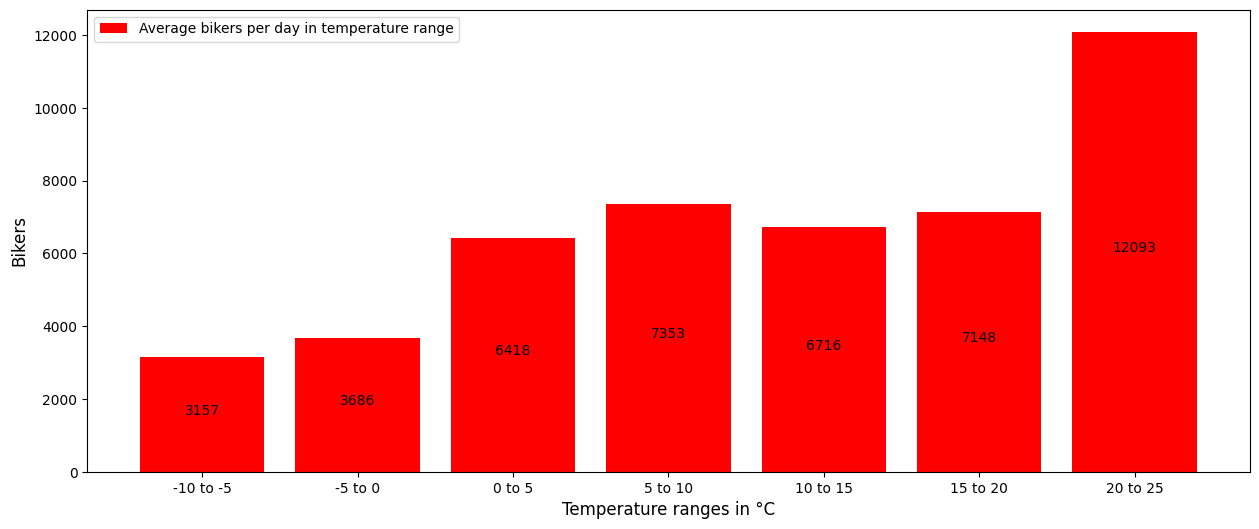

In [1081]:
import matplotlib.pyplot as plt


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, str(y[i]), ha = 'center')

x = ["-10 to -5", "-5 to 0", "0 to 5", "5 to 10", "10 to 15", "15 to 20", "20 to 25"]

y = list((d_avg["Total bikers"] / d_days["Date"]).astype(int))

plt.figure(figsize=(15,6))

plt.bar(x, y, label="Average bikers per day in temperature range", color='red', linewidth = 3)

plt.xlabel("Temperature ranges in °C",fontsize=12)
plt.ylabel("Bikers",fontsize=12)
plt.legend()
addlabels(x, y)




The result shows a clear increase of bikers by raising temperatures. For example, on a day with an avergage daily temperature between 0°C and 5°C, 6418 bikers were driving through Konstanz. While on days with average temperatures between 20°C and 25°C already 12093 bikers have been spotted. It has to be mentioned that this result is also influenced by the fact that less days with average temperatures above 20°C exist. Nethertheless, the assumption, that an increasing temperature leads to an increasing amount of bikers can be backed up.

##### Comparison of the months

To further illustrate this tendency. The amount of bikers for each month is been plotted in a bar char and directly compared to the average monthly temperature. Therefore, first, the combined dataset gets grouped by the column date:

In [1082]:
aggs = {}
for index in df1.columns:
    if not index == 'Date':
        aggs[index] = 'sum'
for index in df2.columns:
    if not index == 'Date':
        aggs[index] = 'mean'
dg = df_all.groupby(pd.Grouper(key='Date', freq='M')).agg(aggs) # Group by month
dg.index = dg.index.strftime('%b') # Use name of month as new Date value

Now two bar charts, one for the amount of average bikers per month and one for the average temperature get plotted:

Text(0.5, 1.0, 'Average temperature per month in °C')

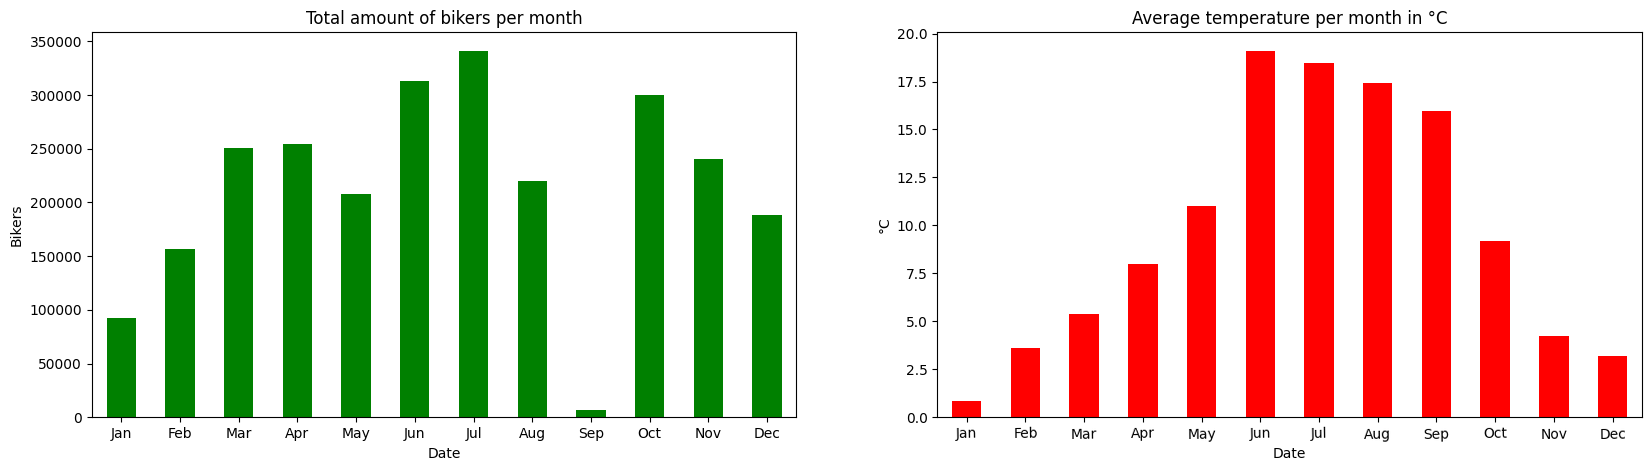

In [1123]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
dg['Total bikers'].plot.bar(rot=0, color="green", figsize=(20,5), ax=ax1)
dg['Average temperature'].plot.bar(rot=1, color="red", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("°C")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Average temperature per month in °C')

There are some parallels between the two plotted bar charts. Especially in colder month, less people are using their bikes, while in warmer months, more bikers can be spotted. 

Therefore a small correlation between temperature and the willingness of people to cycle can be created.

#### Rain fall and the amount of Bikers

The next attribute, that will get inspected is the precipitation, called total rainfall in this project. Before going deeper into the analysis of the precipitation, it is expected, that high precipitation leads to less cyclist, while a lower precipitation creates the opposite. To check this assumption the following analysis is conducted.

##### Grouping the total rainfall

Here the same procedure as for the average temperature will be repeated for the total amount of rainfall. Therefore 13 ranges of each 5mm between 0mm and 65mm get created. then the amount of bikers and the amount of days to each range get calculated:

In [1124]:
d_rain = d.groupby(pd.cut(df_all["Total rainfall"], np.arange(0.0, 70.0, 5.0),include_lowest=True)).sum(numeric_only=True)
d_days_rain = d.groupby(pd.cut(df_all["Total rainfall"], np.arange(0.0, 70.0, 5.0),include_lowest=True)).count()
d_rain[["Total bikers"]].join(d_days_rain[["Date"]])


,Total bikers,Date
Total rainfall,,
"(-0.001, 5.0]",2148337.0,302
"(5.0, 10.0]",235565.0,35
"(10.0, 15.0]",63184.0,12
"(15.0, 20.0]",53110.0,7
"(20.0, 25.0]",20348.0,3
"(25.0, 30.0]",8031.0,2
"(30.0, 35.0]",21403.0,2
"(35.0, 40.0]",0.0,0
"(40.0, 45.0]",0.0,0


The dataset limits the analysis at this point. This is mainly due to the fact that most of the days (>300) rarely any kind of raining took place in Konstanz. This leads to less usable data. Still, for each range the average amount of bikers per day will be calculated and plotted in a bar chart:

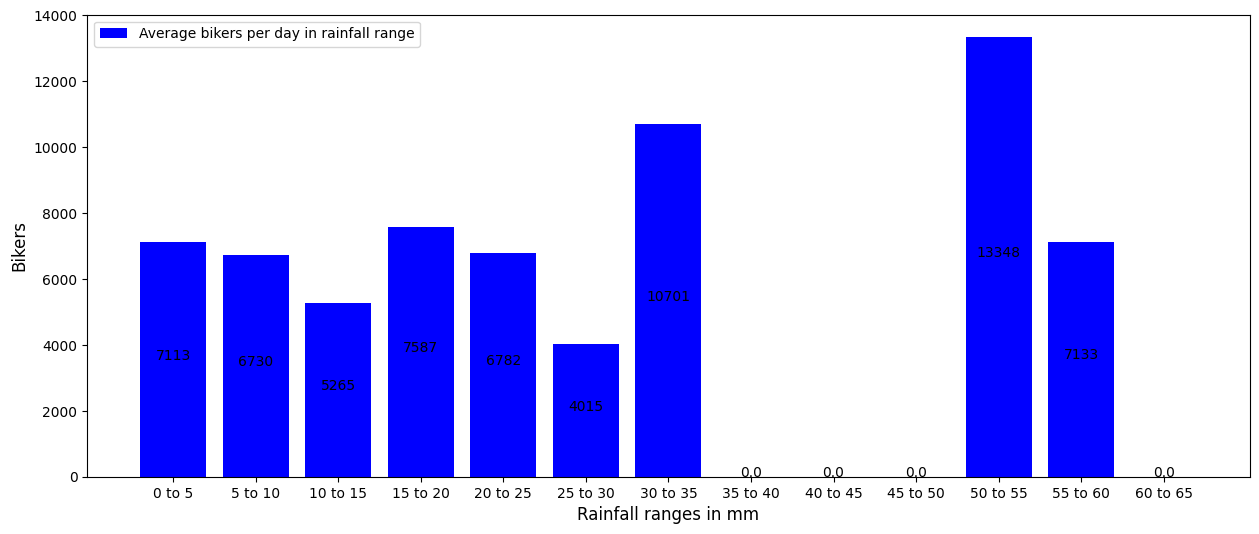

In [1125]:
x = ["0 to 5", "5 to 10", "10 to 15", "15 to 20", "20 to 25", "25 to 30", 
     "30 to 35", "35 to 40", "40 to 45", "45 to 50", "50 to 55", "55 to 60", "60 to 65"]

y = list(d_rain["Total bikers"])

for i in range(len(d_rain["Total bikers"])):
    if not list(d_days_rain["Total bikers"])[i] == 0:
        y[i] = int(y[i]/list(d_days_rain["Date"])[i])


plt.figure(figsize=(15,6))

plt.bar(x, y, label="Average bikers per day in rainfall range", color='blue', linewidth = 3)

plt.xlabel("Rainfall ranges in mm",fontsize=12)
plt.ylabel("Bikers",fontsize=12)
plt.legend()
addlabels(x, y)

The results does not show a specific correaltion between the amount of rainfall and the amount of bikers. This will be further addressed in the conclussion.

##### Comparison of the month

The following two bar charts about the montly amount of cyclists and the total rainfall in mm in Konstanz undermines the statement, that there is no clearly visible correlation between the precipitation and the amount of bikers within this dataset.

Text(0.5, 1.0, 'precipitation per month in mm')

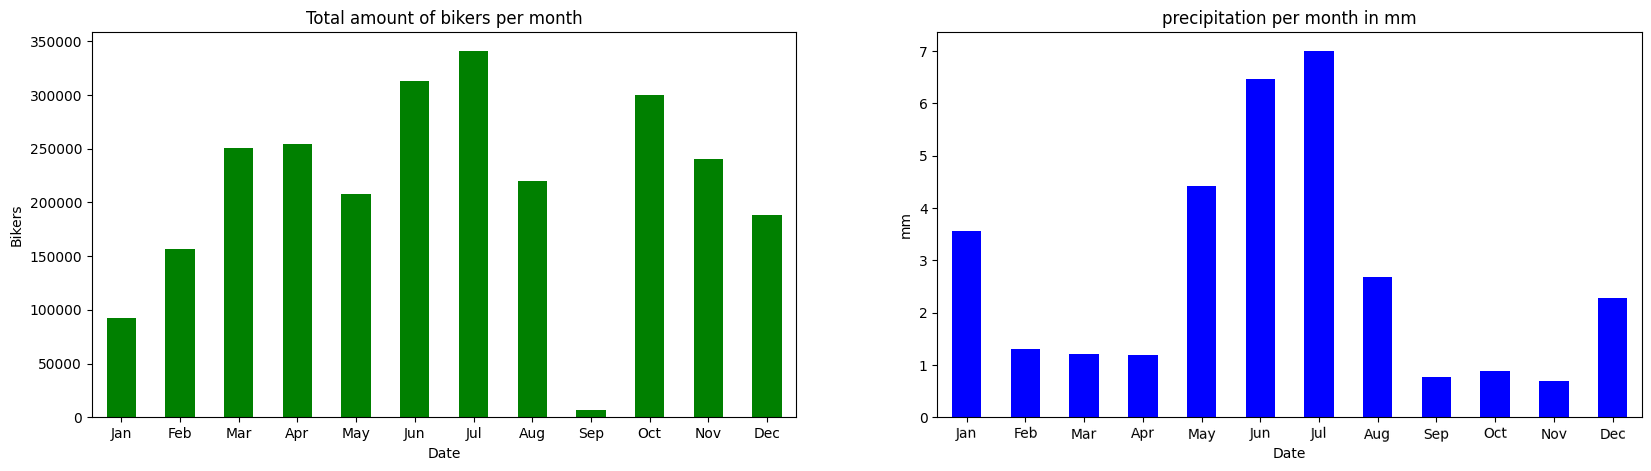

In [1126]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
dg['Total bikers'].plot.bar(rot=0, color="green", figsize=(20,5), ax=ax1)
dg['Total rainfall'].plot.bar(rot=1, color="blue", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("mm")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('precipitation per month in mm')

The percipitation does not show a correlation to the amount of bikers. The assumption, that more cyclist are on the streets if their is less percipitation and vice versa can therefore not be approved.

#### Duration of sunshine and the amount of bikers

The last attribute, we are looking into is the durationof sunshine. This attribute is expected to have a significant influence on the amount of cyclists in Konstanz. In the following analysis, I want to proof, that days with a higher average duration of sunshine, will lead to more people using a bicycle.

##### Grouping the duration of sunshine

Similar to the percipitation and the average temperature, the analysis consists of two steps. First the duration of sunshine is grouped into ranges of 50 minutes starting with zero minutes and going up till 950 minutes per day.

In [1127]:
d_sun = d.groupby(pd.cut(df_all["Duration of sunshine"], np.arange(0.0, 1000.0, 50.0),include_lowest=True)).sum(numeric_only=True)
d_days_sun = d.groupby(pd.cut(df_all["Duration of sunshine"], np.arange(0.0, 1000.0, 50.0),include_lowest=True)).count()
d_sun[["Total bikers"]].join(d_days_sun[["Date"]])

,Total bikers,Date
Duration of sunshine,,
"(-0.001, 50.0]",508202.0,93
"(50.0, 100.0]",124197.0,20
"(100.0, 150.0]",95736.0,17
"(150.0, 200.0]",96404.0,17
"(200.0, 250.0]",140688.0,19
"(250.0, 300.0]",186155.0,25
"(300.0, 350.0]",165897.0,21
"(350.0, 400.0]",146229.0,17
"(400.0, 450.0]",102600.0,13


The following plot shows the average amount of bikers per day for differen levels of sunshine-duration.

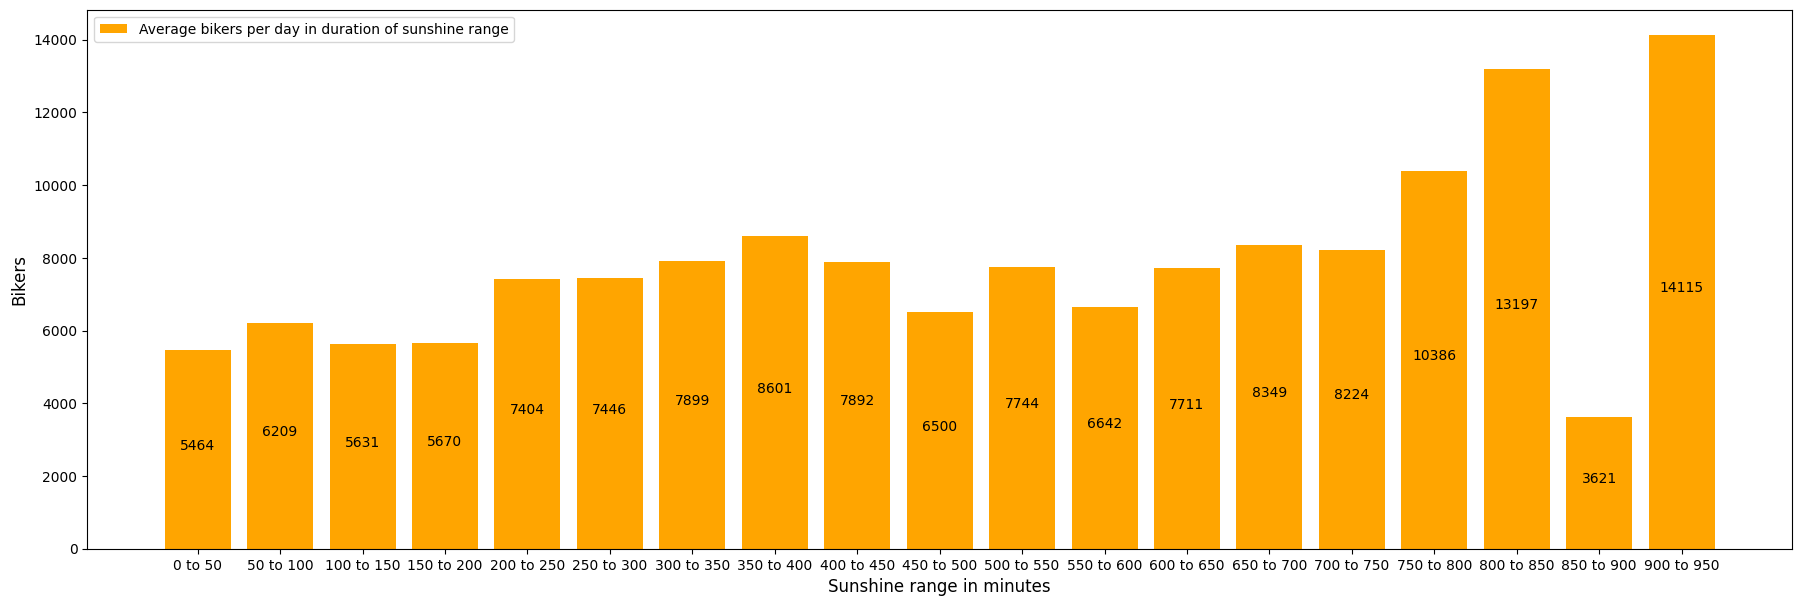

In [1128]:
import matplotlib.pyplot as plt


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, str(y[i]), ha = 'center')

x = ["0 to 50", "50 to 100", "100 to 150", "150 to 200", "200 to 250", "250 to 300", "300 to 350", "350 to 400", "400 to 450",
     "450 to 500", "500 to 550", "550 to 600", "600 to 650", "650 to 700","700 to 750", "750 to 800", "800 to 850", "850 to 900", "900 to 950"]

y = list((d_sun["Total bikers"] / d_days_sun["Date"]).astype(int))

plt.figure(figsize=(22,7))

plt.bar(x, y, label="Average bikers per day in duration of sunshine range", color='orange', linewidth = 3)

plt.xlabel("Sunshine ranges in minutes",fontsize=12)
plt.ylabel("Bikers",fontsize=12)
plt.legend()
addlabels(x, y)

Except for a duration between 850 minutes and 900 minutes, an tendency can be seen. The higher the amount of sunshine per day, the more people are using their bikes. 

##### Comparison of the months

To further undermine the assumption a comparison of the month is created in the following.

Text(0.5, 1.0, 'Duration of sunshine per month in minutes')

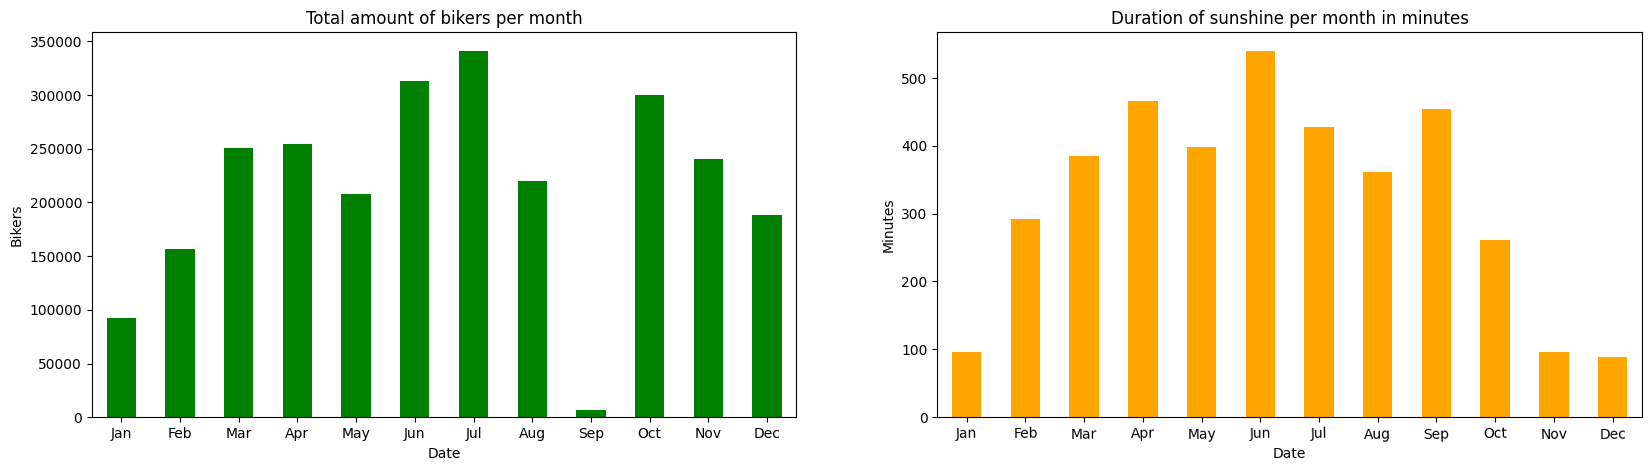

In [1129]:

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))  # 1 row, 2 columns
dg['Total bikers'].plot.bar(rot=0, color="green", figsize=(20,5), ax=ax1)
dg['Duration of sunshine'].plot.bar(rot=1, color="orange", figsize=(20,5), ax=ax2)
ax1.set_ylabel("Bikers")
ax2.set_ylabel("Minutes")
ax1.set_title('Total amount of bikers per month')
ax2.set_title('Duration of sunshine per month in minutes')

There are parallels between the two plots. Generally, months with a higher duration of sunshine had higher amount of cyclist. Novermber and december are exceptions in this regard.

## 3. Conclussion

In this chapter the whole project will be briefly summarized. Therefore the findings will be summarized and the proect question will be answered. Afterwards all problems regarding this project and the datasets will be mentioned. Lastly a brief outlook will follow.

### 3.1. Summary of findings

##### Average Temperature:

The analysis revealed a small correlation between average temperature and cyclist counts. Specifically, higher or milder temperatures were associated with increased cyclist numbers. This suggests that individuals are more inclined to cycle when the weather is warmer or more pleasant.

##### Total rainfall:

Due to the limited number of rainy days in the dataset, a clear correlation between rainfall and cyclist counts could not be established. The scarcity of data on rainy days prevented a comprehensive analysis of how precipitation influences cycling behavior in Konstanz.

##### Duration of Sunshine:

A correlation was observed between the duration of sunshine and cyclist counts. Specifically, more sunshine was associated with higher numbers of cyclists. This finding suggests that favorable weather conditions, characterized by ample sunshine, may encourage individuals to choose cycling as a mode of transportation.


In conclusion, the analysis indicated that temperature and sunshine play a role in influencing cyclist counts in Konstanz, with higher or milder temperatures and increased sunshine being associated with increased cycling activity. However, the analysis of rainfall was inconclusive due to the limited number of rainy days in the dataset. These findings provide valuable insights into the relationship between weather conditions and cyclist behavior, highlighting the importance of considering weather factors when designing cycling infrastructure and promoting active transportation in the region.

### 3.2. Problems

During the course of this project, several challenges arose primarily due to the nature of the datasets utilized. These challenges had an impact on the overall analysis and limited the depth of the findings. Two main issues emerged as key problems during the project: the absence of data for the month of September in dataset 1 and the limited amount of data available for analysis due to the duration of the dataset.

One of the primary setbacks encountered was the unexpected absence of data for the month of September in dataset 1. This missing data for an entire month poses a significant hurdle to the analysis, as it prevents a comprehensive examination of the relationship between weather conditions and cyclist counts during that specific time frame. The lack of monitoring and recording of cycling activity during September diminishes the completeness of the dataset and makes it challenging to draw accurate conclusions for that particular period. Consequently, the analysis becomes more complex, as the findings may not fully capture the potential impact of weather conditions on cyclist counts during September, which could have distinct patterns or characteristics compared to other months.

Furthermore, another notable challenge was the limited duration of the dataset, which encompassed only a single year. This restriction inherently reduced the amount of information and data available for analysis. An issue arising from this limitation is evident when examining the influence of precipitation on cyclist counts. With regards to the attribute of rain, it becomes difficult to conduct a meaningful analysis due to the scarcity of data concerning days with rain. Specifically, in the dataset for the year 2021 in Konstanz, there were significantly fewer instances of rain, with approximately 80% of all days having either no or negligible rainfall. This insufficient representation of rainy days hinders the ability to draw robust conclusions regarding the impact of precipitation on cyclist counts. A more extensive dataset spanning multiple years would have provided a more comprehensive and representative sample, allowing for a more reliable analysis of the relationship between rainfall and cyclist behavior.

### 3.3. Outlook

While this project has provided some insights into the relationship between weather conditions and daily cyclist counts in Konstanz, there are several avenues for future research and improvements that could enhance the results and further our understanding of this relationship.

Firstly, expanding the dataset to include a larger timeframe and a more comprehensive set of variables related to weather conditions would likely lead to more robust and accurate conclusions. By incorporating additional weather parameters such as humidity, visibility, and atmospheric pressure, the analysis could capture a more comprehensive picture of how various weather factors influence cycling behavior. Furthermore, including data from multiple locations within the region could provide insights into how local variations in weather patterns impact cyclist counts.

Additionally, incorporating demographic and socio-economic data into the analysis could reveal how different population groups respond to weather conditions when it comes to cycling. Factors such as age, income level, and employment status may interact with weather conditions in complex ways, influencing the decision to cycle on a given day. Exploring these interactions could provide a more nuanced understanding of the relationship between weather and cycling patterns.

Despite the potential for further exploration, this project has yielded interesting findings and valuable lessons. Through the analysis, it has been discovered that weather conditions do indeed have an impact on daily cyclist counts in Konstanz. The findings have identified specific weather conditions that are more likely to discourage or encourage cycling activity. For example mild temperatures and clear skies are associated with higher cyclist counts.

This project has underscored the importance of considering weather conditions when designing and implementing cycling infrastructure and policies. By understanding the weather-related factors that influence cycling behavior, urban planners and policymakers can develop targeted interventions to encourage cycling and make informed decisions regarding cycling infrastructure improvements. Ultimately, this research contributes to the broader goal of promoting sustainable and active transportation in Konstanz, fostering a healthier, more environmentally friendly, and livable city.

In conclusion, this project has successfully explored the relationship between weather conditions and daily cyclist counts in Konstanz. By expanding the dataset, incorporating additional weather variables, and considering socio-economic factors, future research could further enhance our understanding of this relationship. Nevertheless, this project has been very interesting and insightful, highlighting the importance of weather in shaping cycling behavior.

